In [1]:
#IMPORT ALL THE REQUIRED LIBERARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Optional: for warnings suppression
import warnings
warnings.filterwarnings('ignore')

# Set visualizations inline
%matplotlib inline

In [2]:
# Load the dataset (....)
CALLOUT = pd.read_csv('CALLOUT.csv.gz')

# Preview the dataset
CALLOUT.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SUBMIT_WARDID,SUBMIT_CAREUNIT,CURR_WARDID,CURR_CAREUNIT,CALLOUT_WARDID,CALLOUT_SERVICE,REQUEST_TELE,...,CALLOUT_STATUS,CALLOUT_OUTCOME,DISCHARGE_WARDID,ACKNOWLEDGE_STATUS,CREATETIME,UPDATETIME,ACKNOWLEDGETIME,OUTCOMETIME,FIRSTRESERVATIONTIME,CURRENTRESERVATIONTIME
0,402,854,175684,52.0,NaN,29.0,MICU,1,MED,0,...,Inactive,Discharged,29.0,Acknowledged,2146-10-05 13:16:55,2146-10-05 13:16:55,2146-10-05 13:24:00,2146-10-05 18:55:22,2146-10-05 15:27:44,NaN
1,403,864,138624,15.0,NaN,55.0,CSRU,55,CSURG,0,...,Inactive,Discharged,55.0,Acknowledged,2114-11-28 08:31:39,2114-11-28 09:42:08,2114-11-28 09:43:08,2114-11-28 12:10:02,NaN,NaN
2,404,864,138624,12.0,NaN,55.0,CSRU,55,CSURG,1,...,Inactive,Discharged,55.0,Acknowledged,2114-11-30 10:24:25,2114-12-01 09:06:18,2114-12-01 12:26:05,2114-12-01 21:55:05,NaN,NaN
3,405,867,184298,7.0,NaN,17.0,CCU,17,CCU,1,...,Inactive,Discharged,17.0,Acknowledged,2136-12-29 08:45:42,2136-12-29 10:17:16,2136-12-29 10:33:51,2136-12-29 18:10:02,NaN,NaN
4,157,306,167129,57.0,NaN,3.0,SICU,44,NSURG,1,...,Inactive,Discharged,3.0,Acknowledged,2199-09-18 11:47:47,2199-09-18 11:47:47,2199-09-18 11:58:33,2199-09-18 15:10:02,NaN,NaN


In [3]:
CALLOUT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34499 entries, 0 to 34498
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ROW_ID                  34499 non-null  int64  
 1   SUBJECT_ID              34499 non-null  int64  
 2   HADM_ID                 34499 non-null  int64  
 3   SUBMIT_WARDID           34498 non-null  float64
 4   SUBMIT_CAREUNIT         5122 non-null   object 
 5   CURR_WARDID             34498 non-null  float64
 6   CURR_CAREUNIT           34498 non-null  object 
 7   CALLOUT_WARDID          34499 non-null  int64  
 8   CALLOUT_SERVICE         34499 non-null  object 
 9   REQUEST_TELE            34499 non-null  int64  
 10  REQUEST_RESP            34499 non-null  int64  
 11  REQUEST_CDIFF           34499 non-null  int64  
 12  REQUEST_MRSA            34499 non-null  int64  
 13  REQUEST_VRE             34499 non-null  int64  
 14  CALLOUT_STATUS          34499 non-null

In [4]:
# Checking missing values in each column
missing_values_CALLOUT = CALLOUT.isnull().sum()
missing_values_CALLOUT[missing_values_CALLOUT > 0]

SUBMIT_WARDID                 1
SUBMIT_CAREUNIT           29377
CURR_WARDID                   1
CURR_CAREUNIT                 1
DISCHARGE_WARDID           4532
ACKNOWLEDGETIME            1792
FIRSTRESERVATIONTIME      19239
CURRENTRESERVATIONTIME    33335
dtype: int64

In [5]:
# missing value: fill with 'UNKNOWN'
CALLOUT['SUBMIT_WARDID'].fillna('UNKNOWN', inplace=True)

CALLOUT['SUBMIT_CAREUNIT'].fillna('UNKNOWN', inplace=True)

CALLOUT['CURR_WARDID'].fillna('UNKNOWN', inplace=True)

CALLOUT['DISCHARGE_WARDID'].fillna('UNKNOWN', inplace=True)

CALLOUT['CURR_CAREUNIT'].fillna('UNKNOWN', inplace=True)

CALLOUT['ACKNOWLEDGETIME'].fillna('UNKNOWN', inplace=True)

CALLOUT['FIRSTRESERVATIONTIME'].fillna('UNKNOWN', inplace=True)

CALLOUT['CURRENTRESERVATIONTIME'].fillna('UNKNOWN', inplace=True)


In [6]:
missing_values = CALLOUT.isnull().sum()
print(missing_values)

ROW_ID                    0
SUBJECT_ID                0
HADM_ID                   0
SUBMIT_WARDID             0
SUBMIT_CAREUNIT           0
CURR_WARDID               0
CURR_CAREUNIT             0
CALLOUT_WARDID            0
CALLOUT_SERVICE           0
REQUEST_TELE              0
REQUEST_RESP              0
REQUEST_CDIFF             0
REQUEST_MRSA              0
REQUEST_VRE               0
CALLOUT_STATUS            0
CALLOUT_OUTCOME           0
DISCHARGE_WARDID          0
ACKNOWLEDGE_STATUS        0
CREATETIME                0
UPDATETIME                0
ACKNOWLEDGETIME           0
OUTCOMETIME               0
FIRSTRESERVATIONTIME      0
CURRENTRESERVATIONTIME    0
dtype: int64


In [7]:
# Convert datetime columns
date_cols = ['CREATETIME', 'UPDATETIME', 'ACKNOWLEDGETIME', 'OUTCOMETIME',
             'FIRSTRESERVATIONTIME', 'CURRENTRESERVATIONTIME']
for col in date_cols:
    CALLOUT[col] = pd.to_datetime(CALLOUT[col], errors='coerce')

# Drop rows with critical missing values
callout_cleaned = CALLOUT.dropna(subset=['SUBMIT_WARDID', 'CURR_WARDID', 'CURR_CAREUNIT'])

# Drop remaining missing rows (optional)
callout_cleaned = callout_cleaned.dropna()

# Check for duplicates
duplicates = callout_cleaned.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")
callout_cleaned.drop_duplicates(inplace=True)


Total duplicate rows: 0


In [8]:
# Convert string dates to datetime
CALLOUT['ACKNOWLEDGETIME'] = pd.to_datetime(CALLOUT['ACKNOWLEDGETIME'])
CALLOUT['FIRSTRESERVATIONTIME'] = pd.to_datetime(CALLOUT['FIRSTRESERVATIONTIME'])
CALLOUT['CURRENTRESERVATIONTIME'] = pd.to_datetime(CALLOUT['CURRENTRESERVATIONTIME'])

# Verify data types again
print(CALLOUT.dtypes)

ROW_ID                             int64
SUBJECT_ID                         int64
HADM_ID                            int64
SUBMIT_WARDID                     object
SUBMIT_CAREUNIT                   object
CURR_WARDID                       object
CURR_CAREUNIT                     object
CALLOUT_WARDID                     int64
CALLOUT_SERVICE                   object
REQUEST_TELE                       int64
REQUEST_RESP                       int64
REQUEST_CDIFF                      int64
REQUEST_MRSA                       int64
REQUEST_VRE                        int64
CALLOUT_STATUS                    object
CALLOUT_OUTCOME                   object
DISCHARGE_WARDID                  object
ACKNOWLEDGE_STATUS                object
CREATETIME                datetime64[ns]
UPDATETIME                datetime64[ns]
ACKNOWLEDGETIME           datetime64[ns]
OUTCOMETIME               datetime64[ns]
FIRSTRESERVATIONTIME      datetime64[ns]
CURRENTRESERVATIONTIME    datetime64[ns]
dtype: object


In [9]:
cat_cols = ['SUBMIT_CAREUNIT', 'CURR_CAREUNIT', 'CALLOUT_SERVICE', 
            'CALLOUT_STATUS', 'CALLOUT_OUTCOME', 'ACKNOWLEDGE_STATUS']

for col in cat_cols:
    callout_cleaned[col + '_CODE'] = callout_cleaned[col].astype('category').cat.codes


In [10]:
callout_cleaned.to_csv('callout_cleaned.csv', index=False)
print(" Saved 'callout_cleaned.csv'")


 Saved 'callout_cleaned.csv'


In [11]:
!pip install sdv


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [12]:
import sdv
print(sdv.__version__)

1.24.1


In [13]:
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

# Fix multiprocessing (optional for Windows)
os.environ["NUMBA_NUM_THREADS"] = "1"
os.environ["JOBLIB_START_METHOD"] = "spawn"

# Load data
callout_cleaned = pd.read_csv('callout_cleaned.csv')

# Metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(callout_cleaned)

# Synthesizer
synthesizer = CTGANSynthesizer(metadata=metadata, epochs=30)
synthesizer.fit(callout_cleaned)

# Sample
synthetic_data = synthesizer.sample(num_rows=1000)
synthetic_data.to_csv('synthetic_callout.csv', index=False)
print(" Synthetic data saved as 'synthetic_callout.csv'")



 Synthetic data saved as 'synthetic_callout.csv'


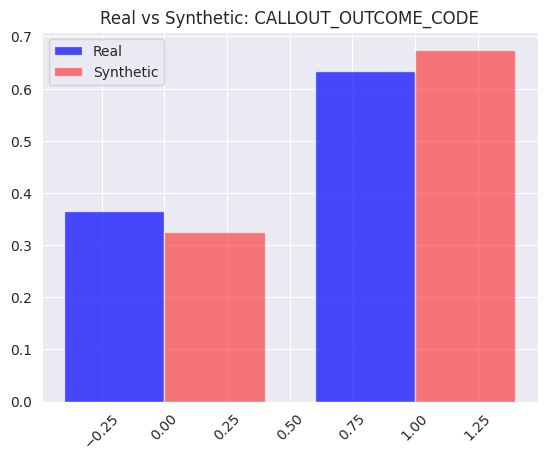

In [14]:
column = 'CALLOUT_OUTCOME_CODE'

# Normalize to proportion
real_counts = callout_cleaned['CALLOUT_OUTCOME_CODE'].value_counts(normalize=True).sort_index()
synthetic_counts = synthetic_data['CALLOUT_OUTCOME_CODE'].value_counts(normalize=True).sort_index()


# Plot
width = 0.4
labels = real_counts.index.astype(str)

x = np.arange(len(labels))
plt.bar(x - width/2, real_counts.values, width=width, label='Real', color='blue', alpha=0.7)
plt.bar(x + width/2, synthetic_counts.values, width=width, label='Synthetic', color='red', alpha=0.5)
plt.legend()
plt.title(f"Real vs Synthetic: {column}")
plt.xticks(rotation=45)
plt.show()


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split  # ← Add this line
from sklearn.metrics import accuracy_score


features = ['CALLOUT_SERVICE_CODE', 'CALLOUT_STATUS_CODE', 'CURR_CAREUNIT_CODE']
target = 'CALLOUT_OUTCOME_CODE'

# Convert categories
for col in features + [target]:
    callout_cleaned[col] = callout_cleaned[col].astype('category').cat.codes
    synthetic_data[col] = synthetic_data[col].astype('category').cat.codes

# Real model
X_real = callout_cleaned[features]
y_real = callout_cleaned[target]
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_real, y_real, test_size=0.3)

model_real = RandomForestClassifier()
model_real.fit(Xr_train, yr_train)
real_acc = accuracy_score(yr_test, model_real.predict(Xr_test))

# Synthetic model
X_syn = synthetic_data[features]
y_syn = synthetic_data[target]
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_syn, y_syn, test_size=0.3)

model_syn = RandomForestClassifier()
model_syn.fit(Xs_train, ys_train)
syn_acc = accuracy_score(ys_test, model_syn.predict(Xs_test))

print(f" Accuracy on real data:     {real_acc:.2f}")
print(f" Accuracy on synthetic data: {syn_acc:.2f}")


 Accuracy on real data:     0.64
 Accuracy on synthetic data: 0.60


In [16]:
#  Import TVAESynthesizer
from sdv.single_table import TVAESynthesizer

#  Initialize VAE synthesizer
vae_synthesizer = TVAESynthesizer(
    metadata=metadata,
    epochs=30  # Same as CTGAN for fair comparison
)

#  Fit the VAE synthesizer
vae_synthesizer.fit(callout_cleaned)

#  Sample synthetic data using VAE
synthetic_data_vae = vae_synthesizer.sample(num_rows=1000)

#  Save VAE synthetic data
synthetic_data_vae.to_csv('synthetic_callout_vae.csv', index=False)

#  Preview VAE synthetic data
synthetic_data_vae.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SUBMIT_WARDID,SUBMIT_CAREUNIT,CURR_WARDID,CURR_CAREUNIT,CALLOUT_WARDID,CALLOUT_SERVICE,REQUEST_TELE,...,ACKNOWLEDGETIME,OUTCOMETIME,FIRSTRESERVATIONTIME,CURRENTRESERVATIONTIME,SUBMIT_CAREUNIT_CODE,CURR_CAREUNIT_CODE,CALLOUT_SERVICE_CODE,CALLOUT_STATUS_CODE,CALLOUT_OUTCOME_CODE,ACKNOWLEDGE_STATUS_CODE
0,16244510,86670,117941,52.0,UNKNOWN,54.0,MICU,1,MED,1,...,2121-08-05 17:08:45,2194-07-12 23:57:20,2131-03-16 03:36:25,2180-06-14 17:01:36,5,2,6,0,1,0
1,13662842,93008,111660,52.0,UNKNOWN,54.0,MICU,2,MED,1,...,2112-05-21 09:33:45,2111-01-08 23:20:04,2100-08-09 14:42:25,2111-06-21 17:55:22,5,2,6,0,1,0
2,5877070,87907,112487,52.0,UNKNOWN,51.0,MICU,2,MED,1,...,2189-11-08 14:15:35,2183-08-18 07:35:35,2180-08-24 12:02:16,2191-09-06 18:59:32,5,2,6,0,1,0
3,8628480,90412,112988,52.0,UNKNOWN,51.0,MICU,1,MED,1,...,2116-06-04 07:26:38,2107-10-24 10:33:33,2127-12-28 05:27:37,2118-11-25 23:13:35,5,2,6,0,1,0
4,9055962,86352,113435,52.0,UNKNOWN,50.0,MICU,1,MED,1,...,2182-10-27 09:39:22,2193-11-04 18:39:10,2182-08-08 15:47:44,2114-07-11 18:59:52,5,2,6,0,1,0


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your synthetic data generated from VAE
synthetic_vae = pd.read_csv('synthetic_callout_vae.csv')

# Preprocessing: convert categorical columns to numeric codes (if not already)
features = ['CALLOUT_SERVICE_CODE', 'CALLOUT_STATUS_CODE', 'CURR_CAREUNIT_CODE']
target = 'CALLOUT_OUTCOME_CODE'

# Make sure all datasets are prepared
for col in features:
    callout_cleaned[col] = callout_cleaned[col].astype('category').cat.codes
    synthetic_vae[col] = synthetic_vae[col].astype('category').cat.codes

# Real data model (already trained if you want, but re-training to be safe)
X_real = callout_cleaned[features]
y_real = callout_cleaned[target]
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_real, y_real, test_size=0.3, random_state=42)

model_real = RandomForestClassifier(random_state=42)
model_real.fit(Xr_train, yr_train)
real_acc = accuracy_score(yr_test, model_real.predict(Xr_test))

# VAE Synthetic data model
X_vae = synthetic_vae[features]
y_vae = synthetic_vae[target]
Xv_train, Xv_test, yv_train, yv_test = train_test_split(X_vae, y_vae, test_size=0.3, random_state=42)

model_vae = RandomForestClassifier(random_state=42)
model_vae.fit(Xv_train, yv_train)
vae_acc = accuracy_score(yv_test, model_vae.predict(Xv_test))

# Show results
print(f" Model accuracy on real data:       {real_acc:.2f}")
print(f" Model accuracy on VAE synthetic data: {vae_acc:.2f}")


 Model accuracy on real data:       0.60
 Model accuracy on VAE synthetic data: 1.00


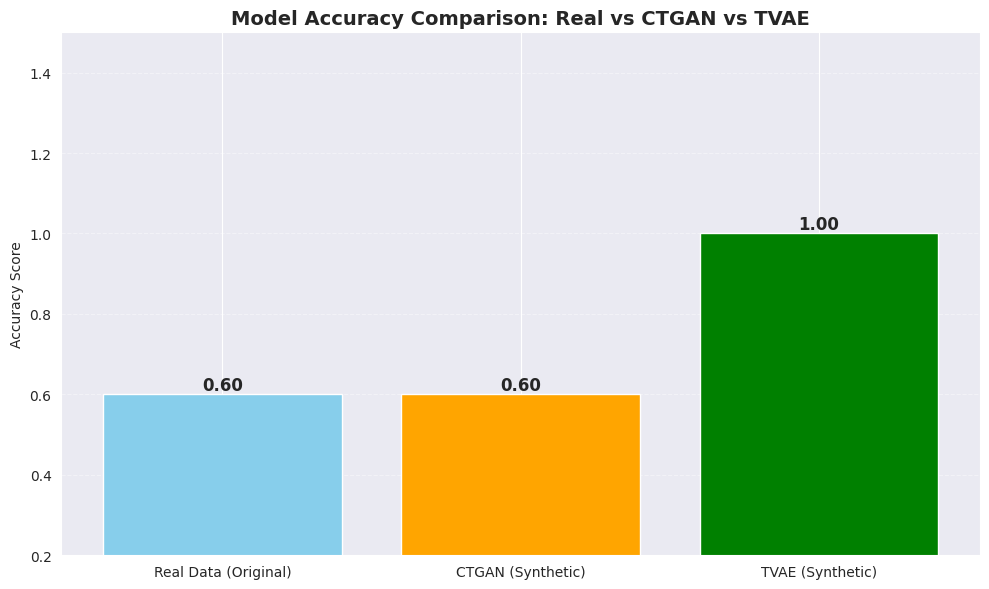

In [18]:
import matplotlib.pyplot as plt

#  accuracy values
# These are from your previous results:
real_acc = real_acc          # Accuracy on real data using real training
vae_acc = vae_acc           # Accuracy on synthetic VAE data
gan_acc = syn_acc           # Accuracy on synthetic GAN (CTGAN) data

# Prepare bar chart data
labels = ['Real Data (Original)', 'CTGAN (Synthetic)', 'TVAE (Synthetic)']
accuracy_scores = [real_acc, gan_acc, vae_acc]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracy_scores, color=['skyblue', 'orange', 'green'])

#  chart elements
plt.title('Model Accuracy Comparison: Real vs CTGAN vs TVAE', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy Score')
plt.ylim(0.2, 1.5)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Annotate bars
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()
